## Hello!

Welcome to **Demo-1**, the following notebook will be showing you what you can do with 1stDayKit's multifarious ML-vision tools! Specifically, we will be looking at a recorded footage of New York City with the following 1stDayKit submodules.
- Detector (based on Detectron2)
- Super-Resolutor (based on ESRGAN)

Have fun!

-------------------------

### 0. Import Packages & Dependencies

In [1]:
#Import libs
from src.core.detect import Detector
from src.core.super_res import SuperReser
from src.core.utils import utils

from PIL import Image

import os
import matplotlib.pyplot as plt
import numpy

### 1. A Simple Single Frame Example

**Note**: <br>
In the following simple example, we will be using the Detector module to perform 1-shot image segmentation, detection and classification on a snapshot taken from the busy pedestrian streets of New York.

In [2]:
#Instantiate detector
det = Detector(name="MyDet")

#Read Image and Prep
# img = Image.open("misc/nyc_single.jpg")
img = Image.open("misc/nyc_superres/out0166.jpg.jpg")

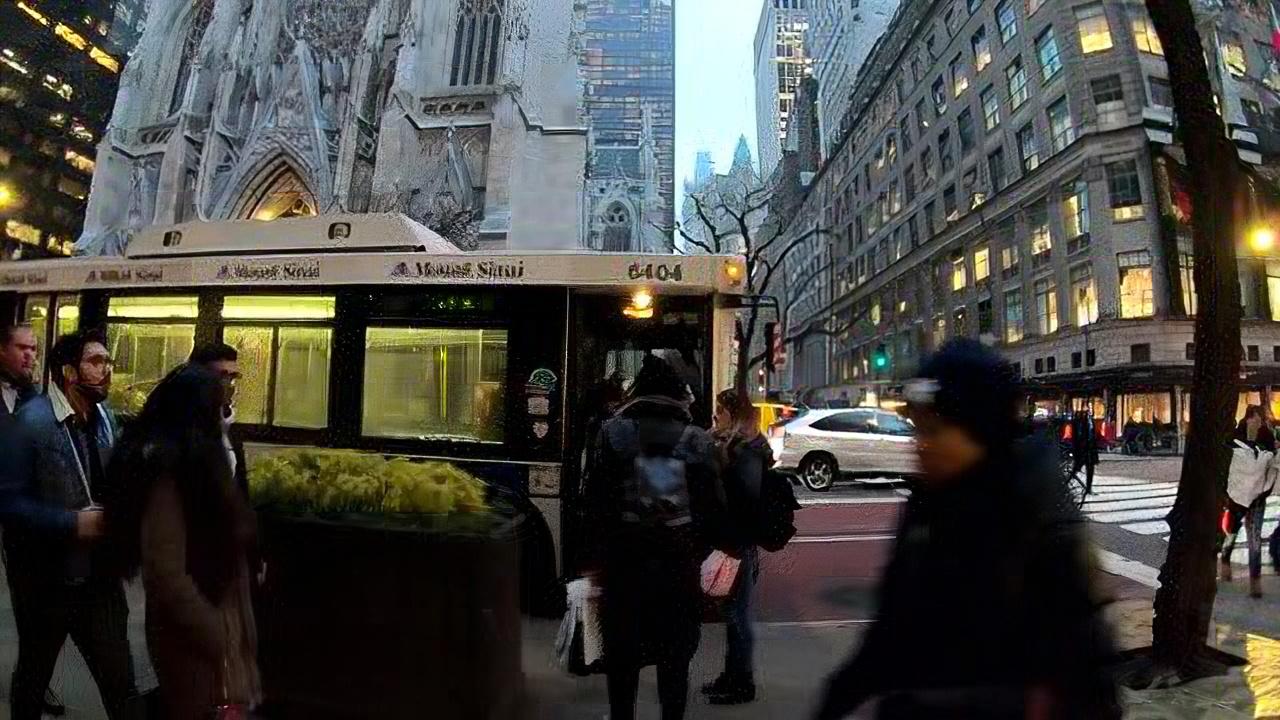

In [3]:
#Viz
img

In [4]:
#Convert to cv2
img_cv = utils.pil_to_cv2(img)

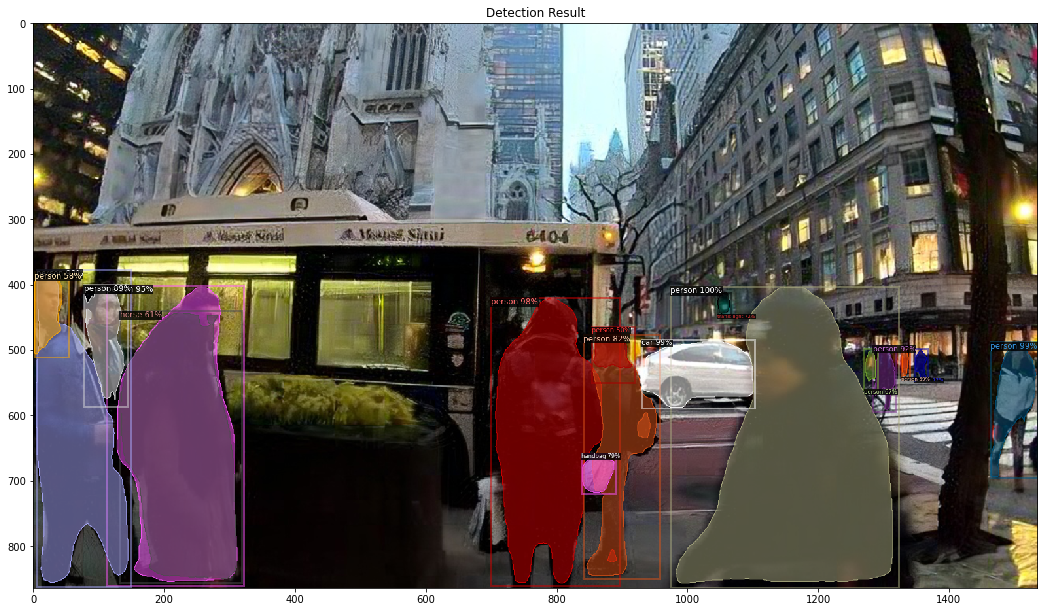

In [5]:
#Infer and visualize result
output = det.predict(img_cv)
out_img = det.visualize(img_cv,output,figsize=(18,18))

-----------------

### 2. A Harder Example

**Note**:<br>
Now we'll look at a sequence of low resolution images (video) and apply the SuperResolutor on said images (sequence) to produce a High Resolution copy before applying Detectron2 on it. The reason is because it's always good to have more pixels to work with!

##### Super-Resolution

In [8]:
#Initialization
super_res = SuperReser(name="SuperResssss")

In [7]:
#Single Example
# img = Image.open("src/core/base_libs/ESRGAN/LR/comic.png")
img = Image.open("src/core/base_libs/ESRGAN/ny/rsz_china-street-changsha-city.jpg")
# img = Image.open("src/core/base_libs/ESRGAN/ny/times-square-in-manhattan-wallpaper-2041_L.jpg")

In [11]:
#Convert to cv2
img_cv = utils.pil_to_cv2(img)

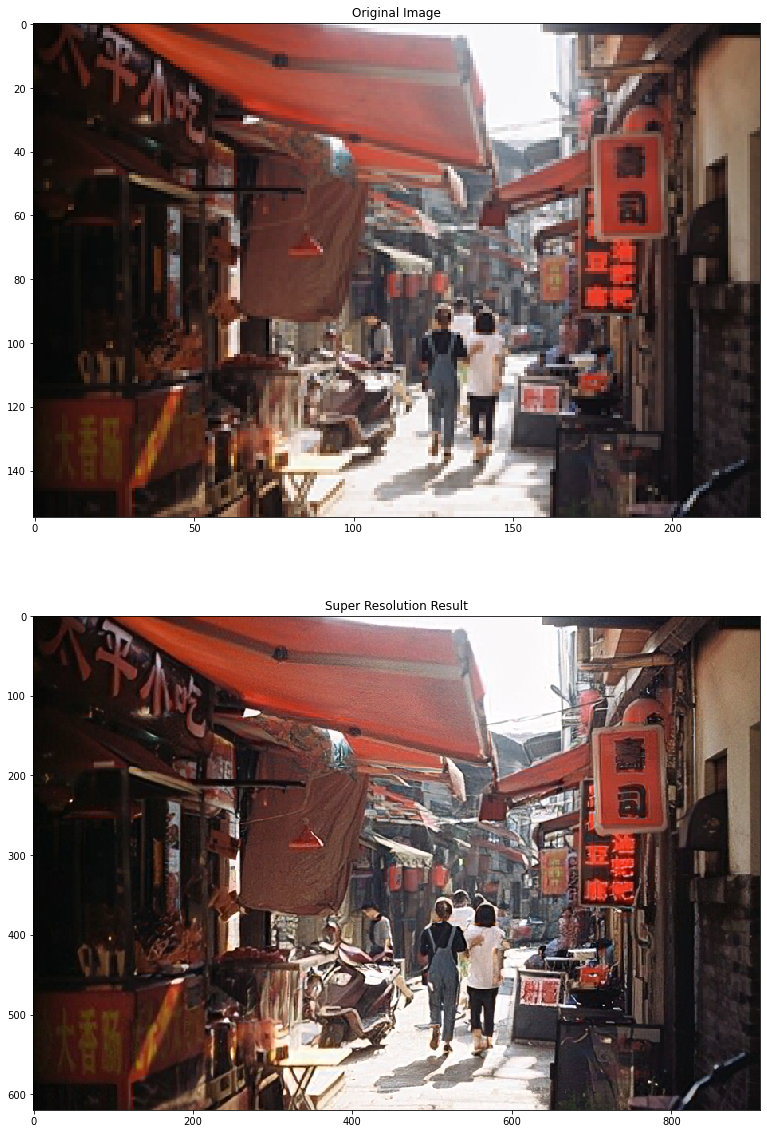

In [12]:
#Infer and visualize
output = super_res.predict(img_cv)
super_res.visualize(img_cv,output,figsize=(20,20))

In [14]:
#Sequence
low_res_dir = "/home/keifer/Documents/MachineLearning/1stdaykit/misc/nyc_low/"

for idx,i in enumerate(os.listdir(low_res_dir)):
    
    #Skip done
    first_three = i.split('.')[0][-3:]
    
    if int(first_three) <= 100:
        print("SKIPPING {}/{}...".format(idx,len(os.listdir(low_res_dir))))
        continue
    
    #Convert to cv2b
    img = Image.open(low_res_dir + i)
    img_cv = utils.pil_to_cv2(img)

    #Infer and visualize
    output = super_res.predict(img_cv)
    super_res.save_image(output,
                         output_path="/home/keifer/Documents/MachineLearning/1stdaykit/misc/nyc_superres/",
                         file_name = i,
                         file_fmt= "jpg")
    
    print("{}/{}...".format(idx,len(os.listdir(low_res_dir))))
    
print("DONE.")

0/299...
1/299...
2/299...
3/299...
4/299...
5/299...
6/299...
SKIPPING 7/299...
SKIPPING 8/299...
9/299...
10/299...
11/299...
12/299...
13/299...
14/299...
SKIPPING 15/299...
SKIPPING 16/299...
SKIPPING 17/299...
18/299...
SKIPPING 19/299...
SKIPPING 20/299...
SKIPPING 21/299...
22/299...
SKIPPING 23/299...
SKIPPING 24/299...
25/299...
26/299...
27/299...
SKIPPING 28/299...
29/299...
SKIPPING 30/299...
31/299...
32/299...
33/299...
34/299...
35/299...
SKIPPING 36/299...
37/299...
38/299...
39/299...
SKIPPING 40/299...
41/299...
42/299...
SKIPPING 43/299...
SKIPPING 44/299...
45/299...
46/299...
47/299...
SKIPPING 48/299...
SKIPPING 49/299...
50/299...
51/299...
52/299...
53/299...
SKIPPING 54/299...
55/299...
56/299...
57/299...
SKIPPING 58/299...
SKIPPING 59/299...
60/299...
SKIPPING 61/299...
62/299...
63/299...
64/299...
65/299...
SKIPPING 66/299...
67/299...
68/299...
SKIPPING 69/299...
70/299...
71/299...
SKIPPING 72/299...
73/299...
74/299...
SKIPPING 75/299...
76/299...
SKIPPI

##### Detectron

In [6]:
#Sequence
low_res_dir = "/home/keifer/Documents/MachineLearning/1stdaykit/misc/nyc_superres/"

for idx,i in enumerate(os.listdir(low_res_dir)):
    
    #Convert to cv2b
    img = Image.open(low_res_dir + i)
    img_cv = utils.pil_to_cv2(img)

    #Infer and visualize
    output = det.predict(img_cv)
    out_img = det.visualize(img_cv,output,figsize=(18,18),noplot=True)
    out_img = Image.fromarray(out_img)
    out_img.save("/home/keifer/Documents/MachineLearning/1stdaykit/misc/nyc_detect/"+i)
    
    print("{}/{}...".format(idx,len(os.listdir(low_res_dir))))

print("DONE.")

0/299...
1/299...
2/299...
3/299...
4/299...
5/299...
6/299...


KeyboardInterrupt: 

**Note**: Now let us visualize and see what we have made! We do so by quickly plotting the individual images (frames) quickly in successive order - in effect creating a video from a set of images.

The function in the cell below may seem daunting and complex, fret not for the code is not as complicated as it seems! It simple reads the proper images from different image folders (e.g. results from superres, detectron), take a predefined chunk of frames from each different image folders and draws (or plots) them with an appropriate descriptive heading text using the *matplotlib figure.canvas* function.

*Feel free to just look at the output of the cell below and ignore the code if you would like as it is not a core component to the hackathon beyond visualization*.

In [ ]:
#Viz
%matplotlib notebook

#Setup params
transition_idx_1 = 50
transition_idx_2 = 100
transition_idx_3 = 250

#Read images superres
root_dir_lr = "misc/nyc_low/"
files_lr = os.listdir(root_dir_lr)
files_lr.sort()
imgs_lr_ = [Image.open(root_dir_lr+i) for i in files_lr]
imgs_lr = imgs_lr_[:transition_idx_1]
imgs_lr_end = imgs_lr_[transition_idx_3:]

#Read images lr
root_dir_hr = "misc/nyc_superres/"
files_hr = os.listdir(root_dir_hr)
files_hr.sort()
imgs_hr = [Image.open(root_dir_hr+i) for i in files_hr]
imgs_hr = imgs_hr[transition_idx_1:transition_idx_2]

#Read detection images
root_dir_det = "misc/nyc_detect/"
files_det = os.listdir(root_dir_det)
files_det.sort()
imgs_det = [Image.open(root_dir_det+i) for i in files_det]
imgs_det = imgs_det[transition_idx_2:transition_idx_3]


#All images
imgs = imgs_lr + imgs_hr + imgs_det + imgs_lr_end

#Initialize plotting tool
num_iters = len(imgs)
fig, ax = plt.subplots(2,1,figsize=(8,8))
fig.show()
fig.canvas.draw()
plt.tight_layout()

#Animate / go through images quickly!
for i in range(num_iters):
    
    #Start timer and clean frames
    ax[0].clear()  

    #Set text
    if i < transition_idx_1:
        text_ = "Raw"
    
    elif transition_idx_1 <= i < transition_idx_2:
        text_ = "Super-Res Enhanced"
        
    elif transition_idx_2 <= i < transition_idx_3:
        text_ = "Detectron Segmantation-Detection-Classification"
        
    elif transition_idx_3 <= i:
        text_ = "Raw"

    #Draw
    ax[0].imshow(imgs[i])
#     ax[0].text(0.02, 0.85, text_, fontsize=28, color='r')
#     ax[0].set_title('Iter # {}/{}'.format(i+1, num_iters))
    ax[0].set_title(text_)

    ax[1].imshow(imgs_lr_[i])
    ax[1].set_title("Raw")
    
    fig.canvas.draw()



<IPython.core.display.Javascript object>

In [48]:
#Save images out
transition_idx_1 = 50
transition_idx_2 = 100
transition_idx_3 = 250

#Read images superres
root_dir_lr = "misc/nyc_low/"
files_lr = os.listdir(root_dir_lr)
files_lr.sort()
imgs_lr_ = [Image.open(root_dir_lr+i) for i in files_lr]
imgs_lr = imgs_lr_[:transition_idx_1]
imgs_lr_end = imgs_lr_[transition_idx_3:]

#Read images lr
root_dir_hr = "misc/nyc_superres/"
files_hr = os.listdir(root_dir_hr)
files_hr.sort()
imgs_hr = [Image.open(root_dir_hr+i) for i in files_hr]
imgs_hr = imgs_hr[transition_idx_1:transition_idx_2]

#Read detection images
root_dir_det = "misc/nyc_detect/"
files_det = os.listdir(root_dir_det)
files_det.sort()
imgs_det = [Image.open(root_dir_det+i) for i in files_det]
imgs_det = imgs_det[transition_idx_2:transition_idx_3]


#All images
imgs = imgs_lr + imgs_hr + imgs_det + imgs_lr_end


#Animate / go through images quickly!
for i,im in enumerate(imgs):

    #Set text
    if i < transition_idx_1:
        text_ = "Raw"
        font = ImageFont.truetype("arial.ttf", 16)
    
    elif transition_idx_1 <= i < transition_idx_2:
        text_ = "Super-Res Enhanced"
        font = ImageFont.truetype("arial.ttf", 32)
        
    elif transition_idx_2 <= i < transition_idx_3:
        text_ = "Detectron Segmantation-Detection-Classification"
        font = ImageFont.truetype("arial.ttf", 32)
        
    elif transition_idx_3 <= i:
        text_ = "Raw"
        font = ImageFont.truetype("arial.ttf", 16)

    #Draw
    draw = ImageDraw.Draw(im)
    draw.text((0, 0),text_,(255,0,0),font=font)



In [70]:
#Save
for imx,im in enumerate(imgs):
    padding_sz = 6
    name = str(imx)
    need = (padding_sz - len(name))*'0'
    name = need + name + '.jpeg'
    
    im = im.resize(imgs[151].size) #resize for consistency
    im.save('misc/nyc_final_1/{}'.format(name))
    


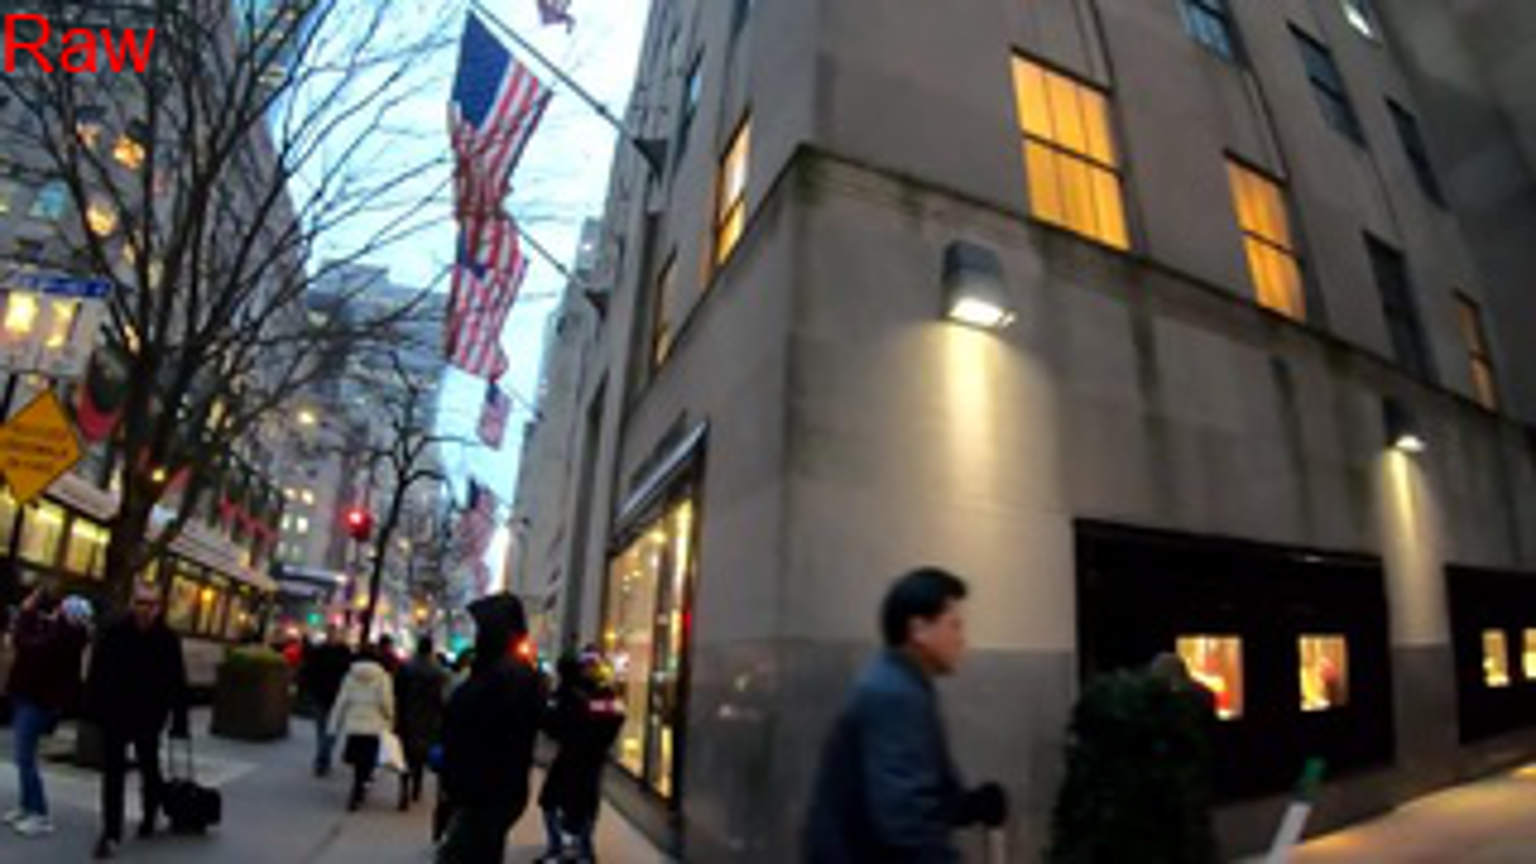

In [69]:
im

------------------

## That's all folks, thank you!